In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Tugas TL

/content/drive/My Drive/Tugas TL


In [ ]:
ls

Data_Daun/


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout

**Mengambil Lokasi DataSet**

In [ ]:
print("[INFO] loading images...")
imagePaths = paths.list_images('Data_Daun')
data = []
labels = []
for imagePath in paths.list_images("Data_Daun"):
    print(imagePath)

[INFO] loading images...
Data_Daun/GMB_01/IMG_20200827_200659.jpg
Data_Daun/GMB_01/IMG_20200815_201810_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201909_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201730_HDR.jpg
Data_Daun/GMB_01/IMG_20200827_200619.jpg
Data_Daun/GMB_01/IMG_20200815_201851_HDR.jpg
Data_Daun/GMB_01/IMG_20200827_200751.jpg
Data_Daun/GMB_01/IMG_20200827_200834.jpg
Data_Daun/GMB_01/IMG_20200827_201145.jpg
Data_Daun/GMB_01/IMG_20200815_201700_HDR.jpg
Data_Daun/GMB_01/IMG_20200827_201242.jpg
Data_Daun/GMB_01/IMG_20200815_202026_HDR.jpg
Data_Daun/GMB_01/IMG_20200827_200730.jpg
Data_Daun/GMB_01/IMG_20200827_200820.jpg
Data_Daun/GMB_01/IMG_20200815_201831_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201943_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201756_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201951_HDR.jpg
Data_Daun/GMB_01/IMG_20200827_201203.jpg
Data_Daun/GMB_01/IMG_20200815_201716_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201522_HDR.jpg
Data_Daun/GMB_01/IMG_20200815_201326_HDR.jpg
Data_Daun/GMB_01/IMG_

**Mengubah Ukuran**

In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)
	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)


In [ ]:
print(labels)


['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

**Melakukan Encoding Label**

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels.shape)

(250, 5)


**Membagi DataSet kedalam (Test dan Train)**

In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
x_train,x_val,y_train,y_val=train_test_split(np.array(data),	np.array(labels), test_size=0.25)
x_test=np.array(data)
y_test=np.array(labels)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((187, 224, 224, 3), (187, 5))
((63, 224, 224, 3), (63, 5))
((250, 224, 224, 3), (250, 5))


**Membangun Model**

In [ ]:
from keras.layers import Dropout
base_model = MobileNet(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(2048, activation='relu')(x)
out = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)  

**Mengkompile Model**

In [ ]:

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [ ]:
print("[INFO] training network...")
opt = Adam(lr=1e-4, decay=1e-3/ 50)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.4734 - accuracy: 0.3904
Epoch 00001: val_accuracy improved from -inf to 0.39600, saving model to best_weight_scene_mobileNet.h5
6/6 [==============================] - 2s 408ms/step - loss: 1.4734 - accuracy: 0.3904 - val_loss: 1.3850 - val_accuracy: 0.3960
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.3430 - accuracy: 0.9251
Epoch 00002: val_accuracy did not improve from 0.39600
6/6 [==============================] - 1s 210ms/step - loss: 0.3430 - accuracy: 0.9251 - val_loss: 1.2479 - val_accuracy: 0.3840
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9840
Epoch 00003: val_accuracy did not improve from 0.39600
6/6 [==============================] - 1s 213ms/step - loss: 0.1432 - accuracy: 0.9840 - val_loss: 1.2401 - val_accuracy: 0.3200
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 1.0000


**Ploting Performansi**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


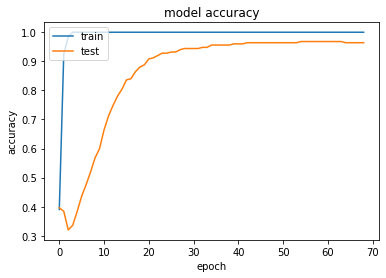

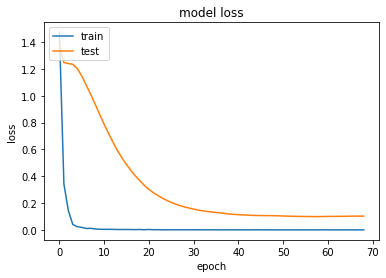

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluasi Hasil**

In [ ]:

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.93      1.00      0.96        50
      GMB_02       1.00      1.00      1.00        50
      GMB_03       1.00      0.92      0.96        50
      GMB_04       0.94      0.96      0.95        50
      GMB_05       0.98      0.96      0.97        50

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



**Simpan Model**

In [ ]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets
